In [1]:
import numpy as np
from TCL_MILP_Testing import TCL_MILP
from All_without_Energy_Limit_MILP import ALL_without_Energy_Limit_MILP

import matplotlib.pyplot as plt

## Individual Function: TCL 

Optimize a model with 10 rows, 5 columns and 30 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+01]
  Objective range  [1e+02, 5e+02]
  Bounds range     [1e+01, 1e+01]
  RHS range        [6e+01, 4e+02]
Presolve removed 7 rows and 1 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 11 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.7364707e+03   1.125316e+01   0.000000e+00      0s
       2    8.5779000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  8.577900000e+03


************************Result************************
Power Status:  [  8.2125   6.059   10.       5.8118   8.2125]
Total Cost:  8577.899999999998


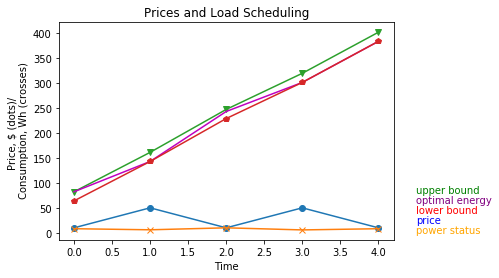

In [4]:
pr = np.array([10, 50, 10, 50, 10])
dt = 10
P = 10
c_water = 0.073
m = 50
temp_up = 25
temp_o = 20
temp_req = 60
temp_en = np.array([25, 20, 18, 15, 15])
di = np.array([25, 27, 28, 22, 25])

# MILP Solution
solution = TCL_MILP(dt, pr, P, c_water, m, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()
ax.plot(pr, 'o-')
ax.plot(solution[0][:], 'x-')
ax.plot(solution[2][:], 'v-')
ax.plot(solution[3][:], 'm-')
ax.plot(solution[1][:], 'p-')
ax.text(4.5,0,'power status',color='orange')
ax.text(4.5,20,'price',color='blue')
ax.text(4.5,40,'lower bound',color='red')
ax.text(4.5,60,'optimal energy',color='purple')
ax.text(4.5,80,'upper bound',color='green')
ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ (dots)/ \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

## Combined Function: focus on TCL

Optimize a model with 36 rows, 35 columns and 110 nonzeros
Variable types: 25 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+02, 1e+04]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+02]
Presolve removed 21 rows and 15 columns
Presolve time: 0.00s
Presolved: 15 rows, 20 columns, 47 nonzeros
Variable types: 15 continuous, 5 integer (5 binary)

Root relaxation: objective 2.872076e+04, 11 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 28720.7571    0    2          - 28720.7571      -     -    0s
H    0     0                    31577.900000 28720.7571  9.05%     -    0s
*    0     0               0    30777.900000 30777.9000  0.00%     -    0s

Explored 1 nodes (16 simplex iterations) in 0.03 seconds
Thread count was 4 (of 4 available processors)

Solution count 2:

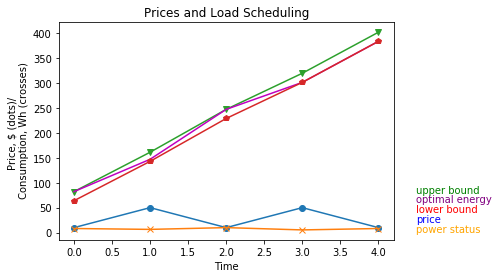

In [5]:
# Parameter Setting
pr = np.array([10, 50, 10, 50, 10])
dt = 10
# For NL
L = 3
P_NL = 20
# For IL
P_IL = 20
E_IL = 500
T_off = 3
Pmin = 0.4 * P_IL
# For TCL
P_TCL = 10
c_water = 0.073
m = 50
temp_up = 25
temp_o = 20
temp_req = 60
temp_en = np.array([25, 20, 18, 15, 15])
di = np.array([25, 27, 28, 22, 25])

# MILP Solution
solution = ALL_without_Energy_Limit_MILP(dt, pr, L, P_NL, P_IL, E_IL, T_off, Pmin, P_TCL, c_water, m, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()
ax.plot(pr, 'o-')
ax.plot(solution[0][:], 'x-')
ax.plot(solution[2][:], 'v-')
ax.plot(solution[3][:], 'm-')
ax.plot(solution[1][:], 'p-')
ax.text(4.5,0,'power status',color='orange')
ax.text(4.5,20,'price',color='blue')
ax.text(4.5,40,'lower bound',color='red')
ax.text(4.5,60,'optimal energy',color='purple')
ax.text(4.5,80,'upper bound',color='green')
ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ (dots)/ \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

Comments: Mostly, using individual MILP function and combined MILP function will give the same result. In this case, results are slightly different in the 2nd and 4th time step. Both are accepted as they both meet all requirements and in the end, the total costs for TCL are the same. 